In [1]:
import importlib
import pandas as pd
import analysis_functions as af
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from scipy import stats
import os
import pickle
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [2]:
# Load the ctl data
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl = pickle.load(f)
    data_ctl.pop(13) # no speed and lick in this animal's tst data
# process the speed and pupil data
for ani in data_ctl:
    data_ctl[ani]['pupil'] = (data_ctl[ani]['pupil'] - np.nanmedian(data_ctl[ani]['pupil'])) / np.nanstd(data_ctl[ani]['pupil']) # normalise the pupil data
    data_ctl[ani]['speed'] = data_ctl[ani]['speed'] - np.percentile(data_ctl[ani]['speed'], 10)  # speed - percentile(speed)


# Load the tst data 
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_tstdata.pkl")
with open(desktop_path, 'rb') as f:
    data_tst = pickle.load(f)
    data_tst.pop(13) # no speed and lick data in this animal
# process the speed and pupil data
for ani in data_tst:
    data_tst[ani]['pupil'] = (data_tst[ani]['pupil'] - np.nanmedian(data_tst[ani]['pupil'])) / np.nanstd(data_tst[ani]['pupil']) # normalise the pupil data
    data_tst[ani]['speed'] = data_tst[ani]['speed'] - np.percentile(data_tst[ani]['speed'], 10)  # speed - percentile(speed)


7294
(array([ 39,  49, 105, 106, 107, 108, 113, 115, 116, 118, 120, 121, 221,
       222, 224, 225, 226, 227, 233, 237, 238, 240, 298, 302, 304, 307,
       308, 309, 311, 312, 313, 314, 316, 317, 318, 319, 320, 322, 455,
       457, 461, 462, 518, 523, 524, 525, 527, 528, 529, 530, 531, 532,
       533, 534, 537, 538, 539, 651, 653, 654, 724, 725, 728, 729, 730,
       731, 733, 834, 836, 902, 903, 907, 910, 914, 915, 917, 918, 919,
       920, 923, 924, 926], dtype=int64),)


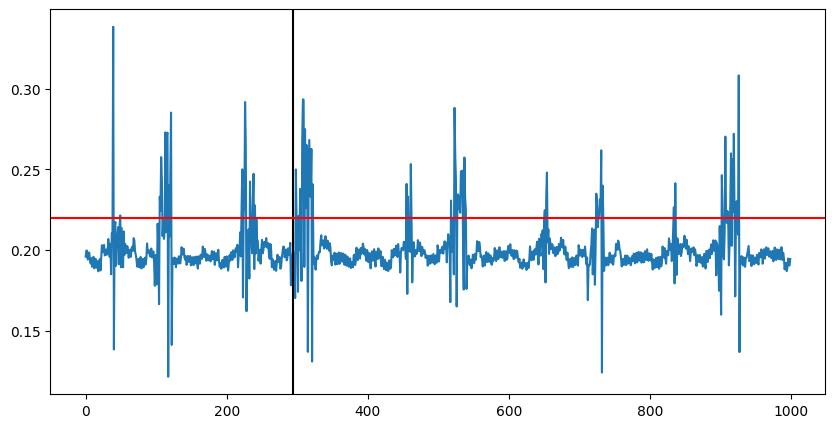

In [3]:
# Unrectified data

fig, axes = plt.subplots(figsize=(10, 5))
ani = 6
max_valid =  0.5 
lick_signal_raw = np.clip(data_ctl[ani]['lick'], a_min=None, a_max=max_valid)
# rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw))

# signal
start = 7000
end = 8000
lick_signal = lick_signal_raw[start:end]
axes.plot(lick_signal)

# lick location
lick = data_ctl[ani]['reward_indices'][32][19]
print(lick)
axes.axvline(lick-start, c='black')

# threshold
threshold = 0.22
axes.axhline(threshold,c='red')
above = lick_signal > threshold
print(np.where(above))

(array([ 308,  316,  321,  322,  323,  324,  325,  326,  327,  666,  667,
        668,  670,  672,  673,  674,  676,  677,  678,  679,  680,  681,
        682,  683,  684,  689,  713,  796,  799,  802, 1107, 1110, 1111,
       1117, 1118, 1119, 1120, 1121, 1122, 1123, 1130, 1587, 1591, 1592,
       1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1639, 1746, 1875,
       1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1890],
      dtype=int64),)
[ 308  316  321  666  670  672  676  689  713  796  799  802 1107 1110
 1117 1130 1587 1591 1639 1746 1875 1877 1890]


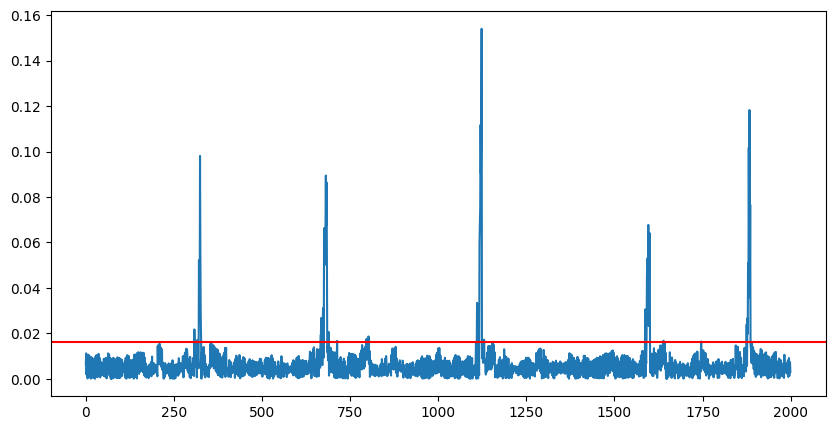

In [4]:
# Rectified data
fig, axes = plt.subplots(figsize=(10, 5))
ani = 3
max_valid =  0.5 
lick_signal_raw = np.clip(data_ctl[ani]['lick'], a_min=None, a_max=max_valid)
rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw))   # *****************

# lick signal
start = 30000
end = 32000
lick_signal = rectified[start:end]
axes.plot(lick_signal)

# lick location
# lick = data_ctl[ani]['reward_indices'][78][19]
# print(lick)
# axes.axvline(lick-start, c='black')

# lick threshold
threshold = 0.016
axes.axhline(threshold,c='red')
above = lick_signal > threshold
print(np.where(above))
crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1  
print(crossings)


In [5]:
data_ctl[3]['unpred_trials']['gr_2']

[15,
 29,
 38,
 45,
 50,
 69,
 82,
 83,
 101,
 105,
 115,
 118,
 132,
 140,
 154,
 156,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209]

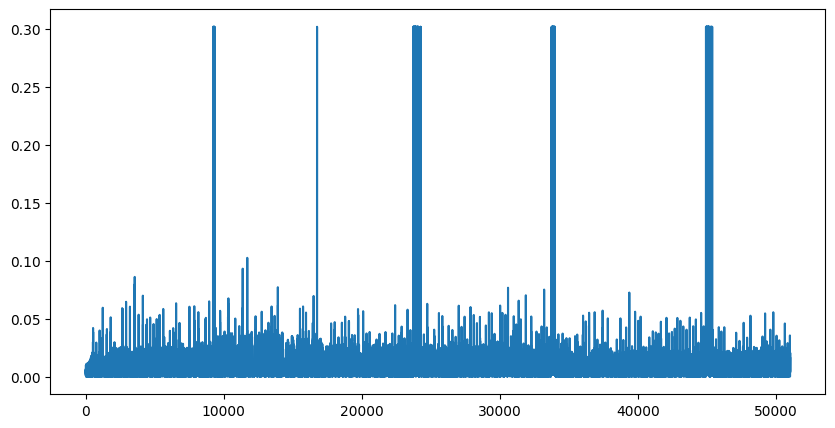

In [6]:
ani = 8
max_valid =  0.5 
lick_signal_raw = np.clip(data_tst[ani]['lick'], a_min=None, a_max=max_valid)
rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw)) 

fig,axes = plt.subplots(figsize=(10,5))
plt.plot(rectified)

for i,trial_start in enumerate(data_tst[ani]['trial_start_indices']):
    if i < len(data_tst[ani]['trial_start_indices'])-1:
        trial_end = data_tst[ani]['trial_start_indices'][i+1]
    else:
        trial_end = data_tst[ani]['trial_start_indices'][-1]
    if len(rectified[trial_start:trial_end])>0:
        threshold = np.percentile(rectified[trial_start:trial_end], 90)
        
        # print(threshold)
        # axes.axhline(y=threshold,c='red')
        # axes.axhline(y=threshold, xmin=trial_start,xmax=trial_end,c='red')



15146


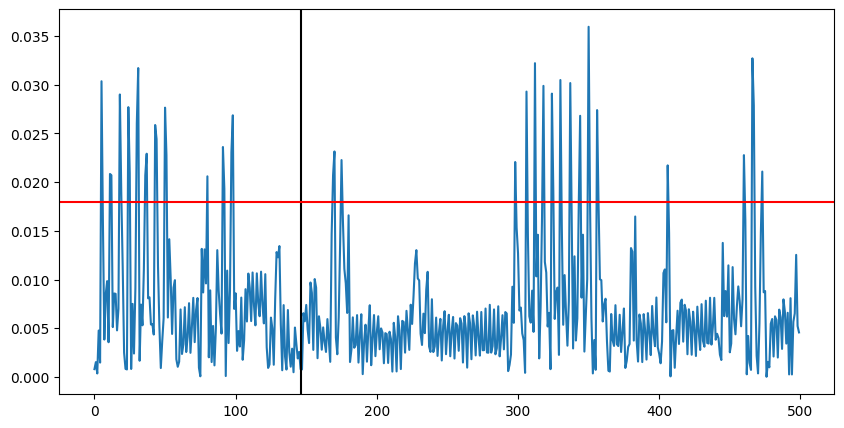

In [7]:
# Rectified data
fig, axes = plt.subplots(figsize=(10, 5))
ani = 8
max_valid =  0.5 
lick_signal_raw = np.clip(data_tst[ani]['lick'], a_min=None, a_max=max_valid)
rectified = lick_signal_raw
rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw)) 
# rectified = rectified*2
# rectified = (rectified - np.median(rectified)) / np.std(rectified)

# lick signal
start = 15000
end = 15500
lick_signal = rectified[start:end]
axes.plot(lick_signal)

# lick location
lick = data_tst[ani]['reward_indices'][52][19]
print(lick)
axes.axvline(lick-start, c='black')

# lick threshold
threshold = 0.018
axes.axhline(threshold,c='red')
above = lick_signal > threshold
# print(np.where(above))
crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1  
# print(crossings)


35817


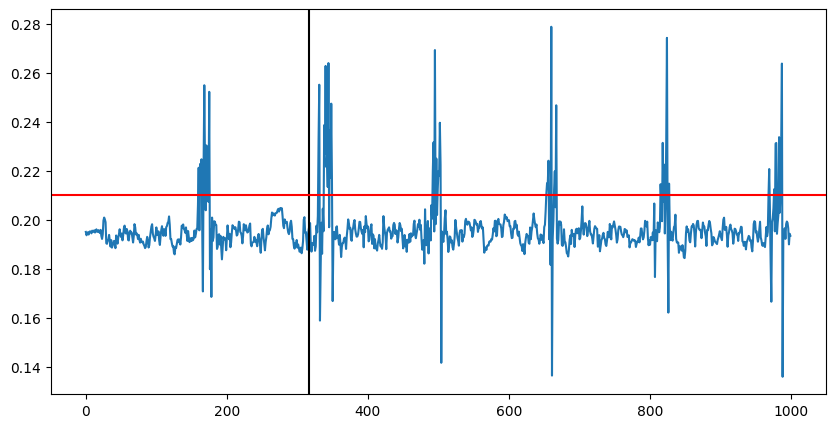

In [8]:
# Rectified data
fig, axes = plt.subplots(figsize=(10, 5))
ani = 7
max_valid =  0.5 
lick_signal_raw = np.clip(data_tst[ani]['lick'], a_min=None, a_max=max_valid)
rectified = lick_signal_raw
# rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw)) 
# rectified = rectified*2
# rectified = (rectified - np.median(rectified)) / np.std(rectified)

# lick signal
start = 35500
end = 36500
lick_signal = rectified[start:end]
axes.plot(lick_signal)

# lick location
lick = data_tst[ani]['reward_indices'][140][19]
lick = data_tst[ani]['reward_indices'][183][19]
print(lick)
axes.axvline(lick-start, c='black')

# lick threshold
threshold = 0.21
axes.axhline(threshold,c='red')
above = lick_signal > threshold
# print(np.where(above))
crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1  
# print(crossings)


15146


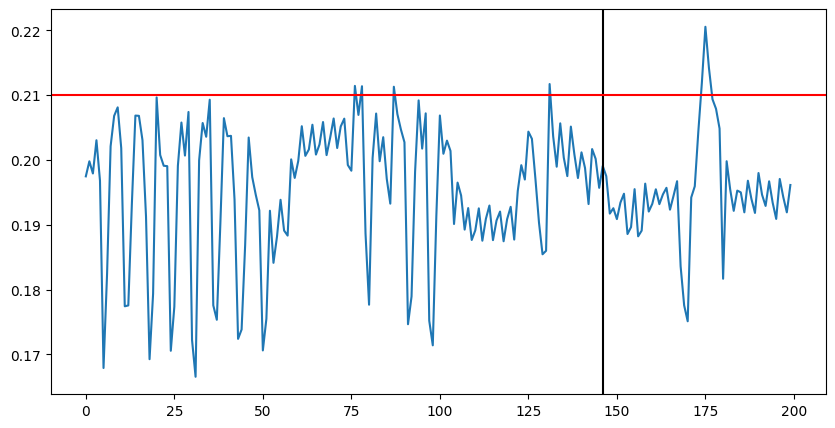

In [9]:
# Rectified data
fig, axes = plt.subplots(figsize=(10, 5))
ani = 8
max_valid =  0.5 
lick_signal_raw = np.clip(data_tst[ani]['lick'], a_min=None, a_max=max_valid)
rectified = lick_signal_raw
# rectified = np.abs(lick_signal_raw - np.median(lick_signal_raw)) 
# rectified = rectified*2
# rectified = (rectified - np.median(rectified)) / np.std(rectified)

# lick signal
start = 15000
end = 15200
lick_signal = rectified[start:end]
axes.plot(lick_signal)

# lick location
lick = data_tst[ani]['reward_indices'][52][19]
print(lick)
axes.axvline(lick-start, c='black')

# lick threshold
threshold = 0.21
axes.axhline(threshold,c='red')
above = lick_signal > threshold
# print(np.where(above))
crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1  
# print(crossings)


In [11]:
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1tstdata_full.pkl")
with open(desktop_path, 'rb') as f:
    data_tst_full = pickle.load(f)
    data_tst_full.pop(13)

In [12]:
data_tst_full[ani]['reward_indices']

array([  73302,  115103,  154352,  194802,  228897,  252834,  277521,
        309831,  338122,  369498,  399272,  423142,  449013,  476570,
        502908,  537620,  569713,  596369,  625310,  662124,  687461,
        708545,  741139,  776452,  801256,  828728,  860404,  885476,
        922506,  949912,  974883, 1021338, 1056784, 1106526, 1157067,
       1213564, 1238235, 1264039, 1285974, 1320336, 1346641, 1379402,
       1423755, 1492562, 1540469, 1573647, 1605940, 1627992, 1648959,
       1670227, 1701603, 1731694, 1762153, 1804305, 1833963, 1864521,
       1889742, 1964838, 2021652, 2058499, 2084771, 2106038, 2126422,
       2150492, 2171343, 2193628, 2221651, 2242235, 2265037, 2292526,
       2318381, 2355762, 2382568, 2411658, 2437413, 2457613, 2493160,
       2520182, 2548205, 2568539, 2599848, 2618980, 2651057, 2679481,
       2709105, 2732658, 2764918, 2796544, 2835677, 2858395, 2881014,
       2901515, 2922766, 2943716, 2964701, 2987219, 3010756, 3038812,
       3066001, 3093

3149408
0.19750064611434937
0.04505930609351044


(35,)

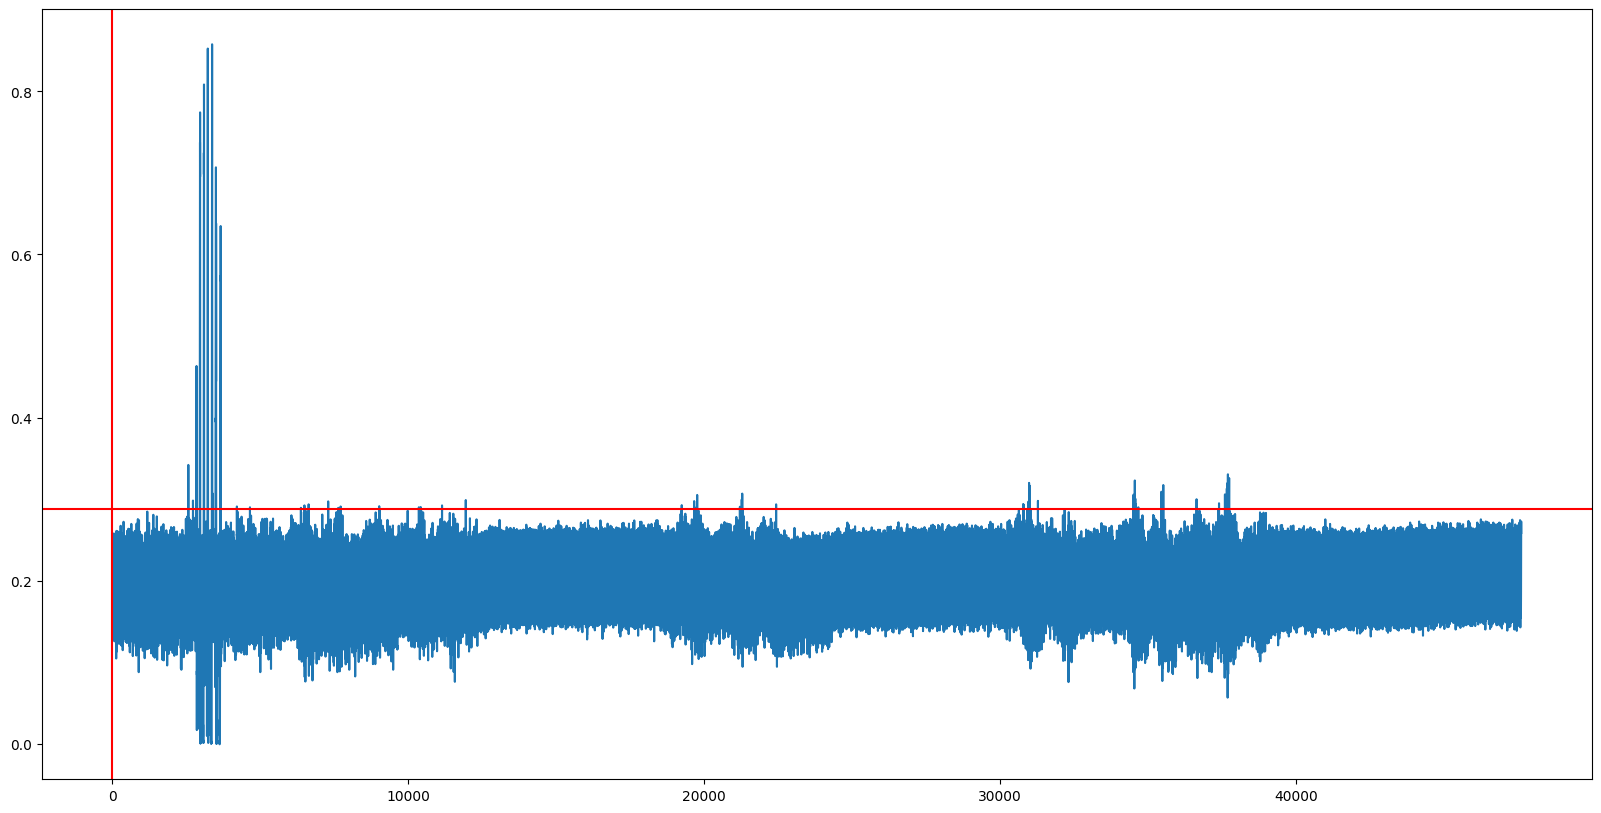

In [ ]:
ani = 4

data_set = data_tst_full

fig, axes = plt.subplots(1, 1, figsize=(20, 10))
lick_onsets_tst = []
max_valid =  1  # upper bound for real licks vs animal pushing licktube
lick_signal_raw = np.clip(data_set[ani]['lick'], a_min=None, a_max=max_valid)
lick_signal = gaussian_filter1d(lick_signal_raw,sigma=0.1)


tri = 80
start = data_set[ani]['reward_indices'][tri] 
end = data_set[ani]['reward_indices'][tri+1]


lick_signal = lick_signal[start:end]
axes.plot(lick_signal)

print(data_set[ani]['reward_indices'][tri])
axes.axvline(data_set[ani]['reward_indices'][tri]-start,c='red')
# axes.axvline(data_set[ani]['reward_indices'][tri]-start,c='red')



threshold = np.percentile(lick_signal, 50) + 2* np.std(lick_signal)

axes.axhline(threshold,c='red')
above = lick_signal > threshold
min_interval = 100  #  refractory period
crossings = np.where(above)[0]
if len(crossings) > 0:
    lick_onsets_tst.append(crossings[0])
    for idx in crossings[1:]:
        if idx - lick_onsets_tst[-1] >= min_interval:
            lick_onsets_tst.append(idx)
    lick_onsets_tst = np.array(lick_onsets_tst)
else:
    lick_onsets_tst = np.array([])

lick_onsets_tst.shape
